In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

prop_2016 = pd.read_csv('../Data/01_raw/properties_2016.csv', low_memory=False)
prop_2017 = pd.read_csv('../Data/01_raw/properties_2017.csv', low_memory=False)
train_2016 = pd.read_csv('../Data/01_raw/train_2016.csv', low_memory=False)
train_2017 = pd.read_csv('../Data/01_raw/train_2017.csv', low_memory=False)
pd.set_option('display.max_columns', None)

In [2]:
# merging property dataset with train dataset
df_2016 = train_2016.merge(prop_2016, how='left', on='parcelid')
df_2017 = train_2017.merge(prop_2017, how='left', on='parcelid')

In [3]:
# concat both dataset
df = pd.concat([df_2016, df_2017], axis=0)

In [59]:
df.head(5)

,logerror,airconditioningtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,regionidcity,unitcnt,yearbuilt
55379,0.022088,1.0,1.0,3.0,2.0,7.0,2323.0,0.0,0.0,2.0,34454965.0,-118553721.0,54311.0,1.0,2005.0
29685,-0.096231,0.0,0.0,5.0,5.0,6.0,2857.0,0.0,0.0,0.0,34044629.0,-118363485.0,12447.0,3.0,1963.0
10660,-0.043385,0.0,0.0,5.5,4.0,0.0,4096.0,2.0,656.0,0.0,33529643.0,-117636889.0,52835.0,0.0,2013.0
64707,-0.030500,1.0,1.0,3.0,3.0,4.0,1550.0,0.0,0.0,2.0,34146161.0,-118392161.0,12447.0,1.0,2005.0
2411,-0.024300,0.0,0.0,4.0,8.0,7.0,3190.0,0.0,0.0,0.0,34216000.0,-118455000.0,12447.0,4.0,1953.0


In [5]:
# checking total missing values for each rows
df.isna().sum()

parcelid                             0
logerror                             0
transactiondate                      0
airconditioningtypeid           114100
architecturalstyletypeid        167420
basementsqft                    167795
bathroomcnt                         34
bedroomcnt                          34
buildingclasstypeid             167857
buildingqualitytypeid            60715
calculatedbathnbr                 1832
decktypeid                      166616
finishedfloor1squarefeet        154995
calculatedfinishedsquarefeet       896
finishedsquarefeet12              8369
finishedsquarefeet13            167813
finishedsquarefeet15            161297
finishedsquarefeet50            154995
finishedsquarefeet6             167081
fips                                34
fireplacecnt                    149992
fullbathcnt                       1832
garagecarcnt                    112431
garagetotalsqft                 112431
hashottuborspa                  163984
heatingorsystemtypeid    

In [6]:
df.dtypes

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


## Column selection

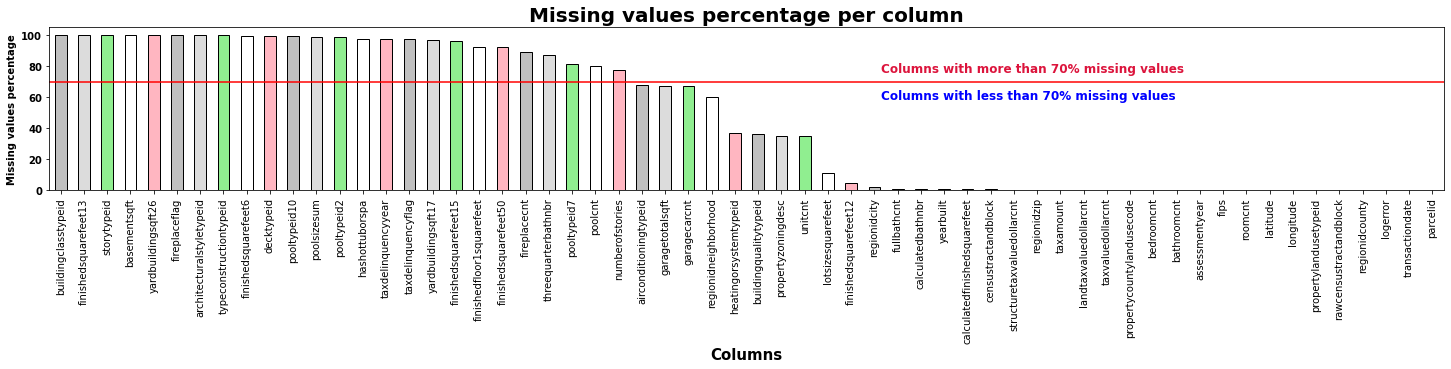

In [7]:
# drop columns with more than 70% NaN values
def total_missing_values(data, thresh=70, color='black', edgecolor='black', width=25, height=3):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

total_missing_values(df, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

In [8]:
nb_rows = df.shape[0]
df1 = df.dropna(thresh=nb_rows * 0.3, axis=1) # On supprime les colonnes avec plus de 106800 valeurs manquantes
print(f"Data shape before cleaning {df.shape}")
print(f"Data shape after cleaning {df1.shape}")
print(f"We dropped {df.shape[1]- df1.shape[1]} columns")

Data shape before cleaning (167888, 60)
Data shape after cleaning (167888, 35)
We dropped 25 columns


In [9]:
# change transactiondate object format to datetime format
df1['transactiondate'] = pd.to_datetime(df1['transactiondate'], format="%Y-%m-%d %H:%M:%S")
df1['transaction_day'] = df1['transactiondate'].dt.dayofweek

<ipython-input-9-b88ed67091ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transactiondate'] = pd.to_datetime(df1['transactiondate'], format="%Y-%m-%d %H:%M:%S")
<ipython-input-9-b88ed67091ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transaction_day'] = df1['transactiondate'].dt.dayofweek


In [10]:
df1.sample(5)

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_day
86853,10754202,0.040200,2016-11-02,1.0,4.0,4.0,10.0,4.0,3436.0,3436.0,6037.0,4.0,NaN,NaN,2.0,34132629.0,-118662413.0,9651.0,010D,269.0,LCC2*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,1.0,1992.0,729387.0,1529969.0,2015.0,800582.0,18711.90,6.037800e+13,2
56266,12377976,0.010189,2017-07-12,NaN,2.0,3.0,6.0,2.0,1371.0,1371.0,6037.0,2.0,NaN,NaN,2.0,33989129.0,-118102933.0,5656.0,0100,261.0,PRSF*,6.037501e+07,26483.0,3101.0,NaN,96197.0,0.0,1.0,1956.0,49163.0,71506.0,2016.0,22343.0,1352.11,6.037501e+13,2
51842,12544642,-0.079000,2016-07-01,NaN,2.0,2.0,4.0,2.0,815.0,815.0,6037.0,2.0,NaN,NaN,2.0,33768300.0,-118159000.0,7400.0,010C,266.0,LBR2A,6.037577e+07,46298.0,3101.0,416304.0,96246.0,0.0,1.0,1964.0,90663.0,113804.0,2015.0,23141.0,1514.94,6.037577e+13,4
48191,12980584,0.022062,2017-06-20,1.0,3.0,4.0,4.0,3.0,2440.0,NaN,6037.0,3.0,NaN,NaN,2.0,34079835.0,-118003371.0,19997.0,0200,246.0,EMR1B*,6.037433e+07,51861.0,3101.0,NaN,96479.0,0.0,2.0,1937.0,199474.0,498686.0,2016.0,299212.0,7613.28,6.037433e+13,1
27220,14229626,-0.000988,2017-04-17,NaN,3.0,6.0,NaN,3.0,2455.0,2455.0,6059.0,3.0,2.0,478.0,NaN,33812592.0,-117825632.0,7220.0,122,261.0,NaN,6.059076e+07,33252.0,1286.0,NaN,97065.0,6.0,NaN,1964.0,163495.0,504513.0,2016.0,341018.0,5487.46,6.059076e+13,0


In [11]:
# keep relevant columns to predice house price only
columns = ['logerror', 'airconditioningtypeid', 'airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'regionidcity', 'unitcnt', 'yearbuilt']

df1 = df1[columns]

In [12]:
df1 = df1.fillna(0)

## Machine Learning Model

In [13]:
from sklearn.model_selection import train_test_split

X = df1[['airconditioningtypeid', 'airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'regionidcity', 'unitcnt', 'yearbuilt']]
y = df1['logerror']

In [14]:
# division du dataset entre sets de validation, d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)

# fit your model
regr.fit(X_train, y_train)

# Calculate the mean absolute error of your Random Forest model on the validation data
predictions = regr.predict(X_test)

result = X_test
result['log_error'] = y_test
result['prediction'] = predictions.tolist()
result.head()

<ipython-input-15-160c5a3bda25>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['log_error'] = y_test
<ipython-input-15-160c5a3bda25>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


,airconditioningtypeid,airconditioningtypeid,airconditioningtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,regionidcity,unitcnt,yearbuilt,log_error,prediction
34951,0.0,0.0,0.0,0.0,2.0,3.0,4.0,2038.0,0.0,0.0,2.0,34073089.0,-117757018.0,20008.0,1.0,1961.0,-0.180300,0.017313
68866,0.0,0.0,0.0,0.0,2.5,4.0,0.0,2997.0,2.0,642.0,0.0,33690511.0,-117975395.0,8384.0,0.0,1997.0,0.055401,0.019031
48198,0.0,0.0,0.0,0.0,2.5,2.0,0.0,1280.0,1.0,0.0,0.0,33561662.0,-117660777.0,12773.0,0.0,1985.0,0.002000,0.007593
37052,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1228.0,1.0,288.0,0.0,33741502.0,-117876397.0,47568.0,0.0,1922.0,-0.012100,0.014639
40985,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1307.0,2.0,472.0,0.0,33777198.0,-118016572.0,24832.0,0.0,1961.0,0.019914,0.013706
